In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_2003 = pd.read_csv("df_dirigido_2003.csv", encoding="latin-1")
df_2004 = pd.read_csv("df_dirigido_2004.csv", encoding="latin-1")
df_2005 = pd.read_csv("df_dirigido_2005.csv", encoding="latin-1")
df_2006 = pd.read_csv("df_dirigido_2006.csv", encoding="latin-1")
df_2007 = pd.read_csv("df_dirigido_2007.csv", encoding="latin-1")
df_2008 = pd.read_csv("df_dirigido_2008.csv", encoding="latin-1")
df_2009 = pd.read_csv("df_dirigido_2009.csv", encoding="latin-1")
df_2010 = pd.read_csv("df_dirigido_2010.csv", encoding="latin-1")
df_2011 = pd.read_csv("df_dirigido_2011.csv", encoding="latin-1")
df_2012 = pd.read_csv("df_dirigido_2012.csv", encoding="latin-1")
df_2013 = pd.read_csv("df_dirigido_2013.csv", encoding="latin-1")

In [28]:
df_list = [df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013]

In [29]:
years = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]

In [30]:
sum_value = []
for i in df_list:
    sum_value.append(i["Value"].sum())

In [31]:
df_1 = pd.DataFrame(sum_value, years)

In [32]:
df_1

,0
2003,1449051.885
2004,1975936.873
2005,2466260.960
2006,2747515.569
2007,4204434.030
2008,4443218.538
2009,3324805.786
2010,3161753.394
2011,3634214.539
2012,3782702.290


In [62]:
df_2003["Value"].sum()

1449051.8849999977

In [66]:
df_2003.loc[df_2003["Partner country"].isin(partners_list),"Value"].sum()

645435.2409999997

In [67]:
df_2003.loc[df_2003["Partner country"].isin(partners_list),"Value"].sum()/df_2003["Value"].sum()*100

44.541899961021805

In [61]:
df_2003.groupby("Reporting country").sum().sort_values("Value", ascending = False).head()

,Unnamed: 0,Value
Reporting country,,
United States,13103880,227180.925
Luxembourg,7228680,177659.187
Netherlands,8726280,132161.238
United Kingdom,13046280,126591.928
Germany,4521480,104291.490


In [52]:
sns.set_style("ticks")
plt.plot(df_1, linestyle=':', linewidth = 3)
plt.title("Valor total de IED por año", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Año")
plt.ylabel("Valor")
path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\valor_ied_por_ano.png"
plt.savefig(path)
plt.close()

In [53]:
df_completo = pd.concat(df_list)

In [54]:
reporting = df_completo.groupby("Reporting country").sum().sort_values("Value", ascending = False).head()
reporting_list = reporting.index

In [55]:
partners = df_completo.groupby("Partner country").sum().sort_values("Value", ascending = False).head()
partners_list = partners.index

In [56]:
df_2003.loc[df_2003["Reporting country"].isin(reporting_list),"Value"].sum()

767884.7680000002

In [57]:
reporting_prop_value = []
for i in df_list:
    reporting_i = i.loc[i["Reporting country"].isin(reporting_list),"Value"].sum()
    total_i = i["Value"].sum()
    reporting_prop_value.append(reporting_i/total_i*100)

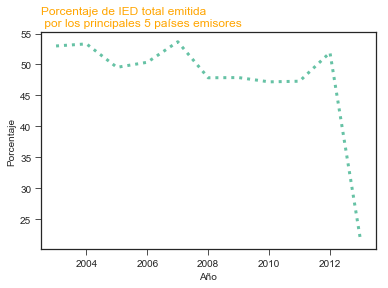

In [58]:
df_2 = pd.DataFrame({"prop" : reporting_prop_value, "years" : years})
df_2.index = df_2.years
sns.set_style("ticks")
plt.plot(df_2["prop"], linestyle=':', linewidth = 3)
plt.title("Porcentaje de IED total emitida \n por los principales 5 países emisores", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Año")
plt.ylabel("Porcentaje")
plt.show()
#path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\ied_emisores_total_por_ano.png"
#plt.savefig(path)
#plt.close()

In [68]:
partner_prop_value = []
for i in df_list:
    partner_i = i.loc[i["Partner country"].isin(partners_list),"Value"].sum()
    total_i = i["Value"].sum()

    partner_prop_value.append(partner_i/total_i*100)

In [69]:
partner_prop_value

[44.541899961021805,
 47.46184080142916,
 49.769295784498055,
 47.017724979450456,
 47.827612364749214,
 47.0488686100275,
 45.3470163384756,
 46.29096553758618,
 50.17072768911732,
 50.880689053644566,
 26.866832736257912]

In [71]:
plt.close()
df_3 = pd.DataFrame({"prop" : partner_prop_value, "years" : years})
df_3.index = df_3.years
plt.plot(df_3["prop"], linestyle=':', linewidth = 3)
plt.title("Porcentaje de IED total recibida \n por los principales 5 países receptores", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Año")
plt.ylabel("Porcentaje")
#plt.show()
path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\ied_receptores_total_por_ano.png"
plt.savefig(path)
plt.close()

In [17]:
partners_list

Index(['United States', 'Luxembourg', 'United Kingdom', 'Netherlands',
       'Belgium'],
      dtype='object', name='Partner country')

Armo gráfico de IED de los 5 principales países emisores

In [18]:
us = []
lux = []
uk = []
neth = []
bel = []

for i in df_list:
    tota_value_i = i["Value"].sum()
    us_i = (i.loc[i["Partner country"]=="United States"].groupby("Partner country").sum()["Value"]/tota_value_i*100).get(0)
    lux_i = (i.loc[i["Partner country"]=="Luxembourg"].groupby("Partner country").sum()["Value"]/tota_value_i*100).get(0)
    uk_i = (i.loc[i["Partner country"]=="United Kingdom"].groupby("Partner country").sum()["Value"]/tota_value_i*100).get(0)
    neth_i = (i.loc[i["Partner country"]=="Netherlands"].groupby("Partner country").sum()["Value"]/tota_value_i*100).get(0)
    bel_i = (i.loc[i["Partner country"]=="Belgium"].groupby("Partner country").sum()["Value"]/tota_value_i*100).get(0)
    
    us.append(us_i)
    lux.append(lux_i)
    uk.append(uk_i)
    neth.append(neth_i)
    bel.append(bel_i)
    
partners_df = pd.DataFrame({"years" : years, "US" : us, "Luxembourg" : lux , "UK" :uk, "Netherlands" :neth, "Belgium":bel})
    

In [19]:
partners_df.index = partners_df.years

In [34]:
plt.close()
plt.plot(partners_df["years"],partners_df["US"], linewidth = 3)
plt.plot(partners_df["years"],partners_df["Luxembourg"], linewidth = 3)
plt.plot(partners_df["years"],partners_df["UK"], linewidth = 3)
plt.plot(partners_df["years"],partners_df["Netherlands"], linewidth = 3)
plt.plot(partners_df["years"],partners_df["Belgium"], linewidth = 3)
plt.title("Porcentaje de IED recibida \n por los principales 5 países receptores", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Año")
plt.ylabel("Porcentaje")
sns.set_palette("Set2")
plt.legend(loc = 3)
path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\ied_receptores_por_ano.png"
plt.savefig(path)
plt.close()

Armo gráfico de IED de los 5 principales países receptores

In [21]:
reporting_list

Index(['United States', 'Luxembourg', 'United Kingdom', 'Netherlands',
       'Germany'],
      dtype='object', name='Reporting country')

In [22]:
us = []
lux = []
uk = []
neth = []
fr = []

for i in df_list:
    tota_value_i = i["Value"].sum()
    us_i = (i.loc[i["Reporting country"]=="United States"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    lux_i = (i.loc[i["Reporting country"]=="Luxembourg"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    uk_i = (i.loc[i["Reporting country"]=="United Kingdom"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    neth_i = (i.loc[i["Reporting country"]=="Netherlands"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    fr_i = (i.loc[i["Reporting country"]=="France"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    
    us.append(us_i)
    lux.append(lux_i)
    uk.append(uk_i)
    neth.append(neth_i)
    fr.append(fr_i)
    
reporting_df = pd.DataFrame({"years" : years, "US" : us, "Luxembourg" : lux , "UK" :uk, "Netherlands" :neth, "France":fr})
    

In [23]:
reporting_df.index = reporting_df.years

In [24]:
reporting_df

,France,Luxembourg,Netherlands,UK,US,years
years,,,,,,
2003,6.846493,12.260374,9.120532,8.736190,15.677901,2003
2004,5.786271,10.009146,5.951387,10.728545,17.556654,2004
2005,8.503641,8.994269,14.368680,8.955862,9.423484,2005
2006,7.970635,8.449397,11.475533,9.632416,12.785160,2006
2007,6.817430,9.631659,7.274542,12.364866,17.133330,2007
2008,7.004476,12.493149,8.771991,9.006725,11.370475,2008
2009,7.441649,13.056120,8.019632,6.277248,15.127978,2009
2010,5.193900,6.229921,9.862143,7.458521,16.571201,2010
2011,5.935610,9.558867,5.228842,9.225988,17.544872,2011


In [35]:
plt.plot(reporting_df["years"],reporting_df["US"], linewidth = 3)
plt.plot(reporting_df["years"],reporting_df["Luxembourg"], linewidth = 3)
plt.plot(reporting_df["years"],reporting_df["UK"], linewidth = 3)
plt.plot(reporting_df["years"],reporting_df["Netherlands"], linewidth = 3)
plt.plot(reporting_df["years"],reporting_df["France"], linewidth = 3)
plt.title("Porcentaje de IED emitido \n por los principales 5 países emisores", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Año")
plt.ylabel("Porcentaje")
sns.set_palette("Set2")
plt.legend(loc = 3)
path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\ied_emisores_por_ano.png"
plt.savefig(path)
plt.close()

Me fijo los valores para la mediana y el tercer cuartil de "Value" para cada año, de los distintos a 0

In [26]:
df_2003.loc[df_2003["Value"]>0].quantile(0.5).get(0)

26974.5

In [27]:
df_2003.loc[df_2003["Value"]>0].quantile(0.5).get(0)

26974.5

In [112]:
median = []
quartile3 = []

for i in df_list:
    median_i = i.loc[i["Value"]>0].quantile(0.5)["Value"]
    quartile3_i = i.loc[i["Value"]>0].quantile(0.75)["Value"]
    median.append(median_i)
    quartile3.append(quartile3_i)
    
quantiles_df = pd.DataFrame({"years" : years, "mediana" : median, "3er_cuartil" : quartile3})

In [113]:
quantiles_df.index = quantiles_df.years

In [114]:
quantiles_df["mediana"]

years
2003    10.167
2004    10.492
2005    14.078
2006    15.062
2007    20.593
2008    23.392
2009    20.557
2010    18.543
2011    20.891
2012    18.733
2013    37.000
Name: mediana, dtype: float64

In [115]:
plt.plot(quantiles_df["years"],quantiles_df["mediana"], linewidth = 3)
plt.plot(quantiles_df["years"],quantiles_df["3er_cuartil"], linewidth = 3)

plt.title("Valor del 3er cuartil y mediana, por año", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Año")
plt.ylabel("Millones de USD")
sns.set_palette("Set2")
plt.legend()
path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\mediana_por_ano.png"
plt.savefig(path)
plt.close()

In [46]:
us = []
lux = []
uk = []
neth = []
bel = []

for i in df_list:
    tota_value_i = i["Value"].sum()
    us_i = i.loc[i["Partner country"]=="United States"].groupby("Partner country").sum()["Value"].get(0)
    lux_i = i.loc[i["Partner country"]=="Luxembourg"].groupby("Partner country").sum()["Value"].get(0)
    uk_i = i.loc[i["Partner country"]=="United Kingdom"].groupby("Partner country").sum()["Value"].get(0)
    neth_i = i.loc[i["Partner country"]=="Netherlands"].groupby("Partner country").sum()["Value"].get(0)
    bel_i = i.loc[i["Partner country"]=="Belgium"].groupby("Partner country").sum()["Value"].get(0)
    
    us.append(us_i)
    lux.append(lux_i)
    uk.append(uk_i)
    neth.append(neth_i)
    bel.append(bel_i)
    
partners_df = pd.DataFrame({"years" : years, "US" : us, "Luxembourg" : lux , "UK" :uk, "Netherlands" :neth, "Belgium":bel})
    

In [47]:
partners_df.index = partners_df.years

In [48]:
plt.close()
sns.set_palette("Set2")
plt.plot(partners_df["years"],partners_df["US"], linewidth = 3)
plt.plot(partners_df["years"],partners_df["Luxembourg"], linewidth = 3)
plt.plot(partners_df["years"],partners_df["UK"], linewidth = 3)
plt.plot(partners_df["years"],partners_df["Netherlands"], linewidth = 3)
plt.plot(partners_df["years"],partners_df["Belgium"], linewidth = 3)
plt.title("IED recibida por los principales 5 países receptores", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Año")
plt.ylabel("Millones de USD")
plt.legend(loc = 3)
#plt.show()
path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\ied_receptores_monto_por_ano.png"
plt.savefig(path)
plt.close()

In [49]:
us = []
lux = []
uk = []
neth = []
fr = []

for i in df_list:
    tota_value_i = i["Value"].sum()
    us_i = (i.loc[i["Reporting country"]=="United States"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    lux_i = (i.loc[i["Reporting country"]=="Luxembourg"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    uk_i = (i.loc[i["Reporting country"]=="United Kingdom"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    neth_i = (i.loc[i["Reporting country"]=="Netherlands"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    fr_i = (i.loc[i["Reporting country"]=="France"].groupby("Reporting country").sum()["Value"]/tota_value_i*100).get(0)
    
    us.append(us_i)
    lux.append(lux_i)
    uk.append(uk_i)
    neth.append(neth_i)
    fr.append(fr_i)
    
reporting_df = pd.DataFrame({"years" : years, "US" : us, "Luxembourg" : lux , "UK" :uk, "Netherlands" :neth, "France":fr})
    

In [50]:
reporting_df.index = reporting_df.years

In [51]:
plt.close()
sns.set_palette("Set2")
plt.plot(reporting_df["years"],reporting_df["US"], linewidth = 3)
plt.plot(reporting_df["years"],reporting_df["Luxembourg"], linewidth = 3)
plt.plot(reporting_df["years"],reporting_df["UK"], linewidth = 3)
plt.plot(reporting_df["years"],reporting_df["Netherlands"], linewidth = 3)
plt.plot(reporting_df["years"],reporting_df["France"], linewidth = 3)
plt.title("IED emitido por los principales 5 países emisores", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Año")
plt.ylabel("Millones de USD")
plt.legend(loc = 3)
#plt.show()
path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\ied_emisores_monto_por_ano.png"
plt.savefig(path)
plt.close()

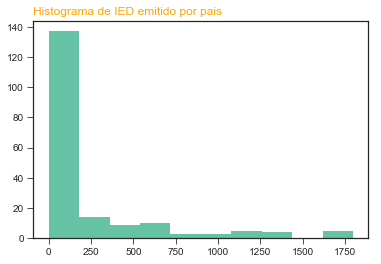

In [110]:
plt.close()
sns.set_palette("Set2")
a = df_2012.groupby("Reporting country").sum()["Value"]
plt.hist(pd.Series(a[a<2000].values))
plt.title("Histograma de IED emitido por pais", loc='left', fontsize=12, fontweight=0, color='orange')

#path = "C:\\Users\\vsilecor.NET01\\Downloads\\grafos-20180118T165154Z-001\\grafos\\resultados\\graficos\\analisis_descriptivo\\hist_1.png"
#plt.savefig(path)
#plt.close()
plt.show()